In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch
from tensorflow.keras import layers, models, regularizers, callbacks
from keras_tuner.tuners import BayesianOptimization

## Load Data

In [ ]:
data = np.load('img_data.npz', allow_pickle=True)
X = data['X']
y = data['y']
label_names = data['label_names']

In [ ]:
print(f'X shape is: {X.shape}')
print(f'y shape is: {y.shape}')
print(f'label_names are: {label_names}')

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

X shape is: (999, 128, 128, 3)
y shape is: (999, 10)
label_names are: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
# CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')  # Output layer
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train/Test the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 572ms/step - accuracy: 0.1314 - loss: 3.3327 - val_accuracy: 0.1750 - val_loss: 2.2612
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 524ms/step - accuracy: 0.2235 - loss: 2.1922 - val_accuracy: 0.2625 - val_loss: 2.1055
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 495ms/step - accuracy: 0.2482 - loss: 2.0523 - val_accuracy: 0.2250 - val_loss: 2.0133
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 511ms/step - accuracy: 0.3411 - loss: 1.8352 - val_accuracy: 0.3313 - val_loss: 1.8856
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 456ms/step - accuracy: 0.3871 - loss: 1.7188 - val_accuracy: 0.3750 - val_loss: 1.7046
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 467ms/step - accuracy: 0.4396 - loss: 1.5829 - val_accuracy: 0.4812 - val_loss: 1.5321
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 517ms/step - accuracy: 0.5339 - loss: 1.4135 - val_accuracy: 0.5063 - val_loss: 1.3941
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 485ms/step - accuracy: 0.5692 - loss: 1.3037 - val_accur

Given that the training accuracy is high while the validation accuracy is plateuing, there is a potential of over fitting. Implement Early Stopping so that model automatically stops at the right time. Also implement regularization.

In [ ]:
# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# CNN model with L2 regularization on Dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Compile the model w scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 520ms/step - accuracy: 0.1188 - loss: 3.3429 - val_accuracy: 0.1750 - val_loss: 2.3774
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 538ms/step - accuracy: 0.2197 - loss: 2.3080 - val_accuracy: 0.2688 - val_loss: 2.2939
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 538ms/step - accuracy: 0.2781 - loss: 2.1450 - val_accuracy: 0.2562 - val_loss: 2.0929
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.3173 - loss: 2.0096 - val_accuracy: 0.3812 - val_loss: 1.9049
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 539ms/step - accuracy: 0.3954 - loss: 1.8283 - val_accuracy: 0.4313 - val_loss: 1.8439
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 537ms/step - accuracy: 0.4153 - loss: 1.7390 - val_accuracy: 0.4625 - val_loss: 1.6934
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 488ms/step - accuracy: 0.5033 - loss: 1.5836 - val_accuracy: 0.4375 - val_loss: 1.7109
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 516ms/step - accuracy: 0.5245 - loss: 1.5952 - val_accu

In [ ]:
# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# CNN model with L2 regularization on Dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Compile the model w scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1241 - loss: 3.3577 - val_accuracy: 0.1500 - val_loss: 2.4514
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2108 - loss: 2.3764 - val_accuracy: 0.2313 - val_loss: 2.2681
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 988ms/step - accuracy: 0.2308 - loss: 2.2422 - val_accuracy: 0.2375 - val_loss: 2.2033
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 924ms/step - accuracy: 0.2798 - loss: 2.1112 - val_accuracy: 0.3187 - val_loss: 2.0901
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 913ms/step - accuracy: 0.3010 - loss: 2.0495 - val_accuracy: 0.3250 - val_loss: 2.0009
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 900ms/step - accuracy: 0.3629 - loss: 1.8748 - val_accuracy: 0.3812 - val_loss: 1.8537
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 879ms/step - accuracy: 0.4370 - loss: 1.7886 - val_accuracy: 0.4313 - val_loss: 1.8309
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 975ms/step - accuracy: 0.4882 - loss: 1.6069 - val_accuracy: 

Try taking global average instead of flatten

In [ ]:
# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# CNN model with L2 regularization on Dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Compile the model w scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 459ms/step - accuracy: 0.1162 - loss: 2.3849 - val_accuracy: 0.0625 - val_loss: 2.3774
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.1160 - loss: 2.3622 - val_accuracy: 0.0625 - val_loss: 2.3594
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 448ms/step - accuracy: 0.1339 - loss: 2.3440 - val_accuracy: 0.1437 - val_loss: 2.3437
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 442ms/step - accuracy: 0.1788 - loss: 2.3296 - val_accuracy: 0.1375 - val_loss: 2.3244
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.1842 - loss: 2.3033 - val_accuracy: 0.1437 - val_loss: 2.2833
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.2075 - loss: 2.2471 - val_accuracy: 0.1437 - val_loss: 2.2369
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.2228 - loss: 2.1899 - val_accuracy: 0.1437 - val_loss: 2.2436
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 437ms/step - accuracy: 0.1766 - loss: 2.1684 - val_accur

## KerasTuner

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(
        filters=hp.Choice('conv_1_filters', values=[32, 64, 128]),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(128, 128, 3)
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(
        filters=hp.Choice('conv_2_filters', values=[64, 128]),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    ))
    model.add(tf.keras.layers.Dropout(
        hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))
    model.add(tf.keras.layers.Dense(y.shape[1], activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,              # Try 10 different combinations
    executions_per_trial=1,     # Can average performance over runs
    directory='tuner_results',
    project_name='cnn_tuning'
)

In [ ]:
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

Trial 10 Complete [00h 06m 31s]
val_accuracy: 0.5625

Best val_accuracy So Far: 0.612500011920929
Total elapsed time: 02h 09m 40s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best dropout rate:", best_hps.get('dropout_rate'))
print("Best conv_1 filters:", best_hps.get('conv_1_filters'))
print("Best learning rate:", best_hps.get('learning_rate'))

Best dropout rate: 0.2
Best conv_1 filters: 32
Best learning rate: 0.0003774139757787652


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# CNN model with L2 regularization on Dense layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Compile the model w scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with early stopping
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1392 - loss: 2.6848 - val_accuracy: 0.1562 - val_loss: 2.2971
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 944ms/step - accuracy: 0.2436 - loss: 2.2136 - val_accuracy: 0.3250 - val_loss: 2.0034
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 827ms/step - accuracy: 0.3569 - loss: 1.9279 - val_accuracy: 0.4375 - val_loss: 1.8276
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 832ms/step - accuracy: 0.4856 - loss: 1.6716 - val_accuracy: 0.4875 - val_loss: 1.7131
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 800ms/step - accuracy: 0.5406 - loss: 1.5663 - val_accuracy: 0.5125 - val_loss: 1.6556
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 913ms/step - accuracy: 0.5751 - loss: 1.4816 - val_accuracy: 0.5500 - val_loss: 1.5138
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 903ms/step - accuracy: 0.6451 - loss: 1.2644 - val_accuracy: 0.5688 - val_loss: 1.5102
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 793ms/step - accuracy: 0.7141 - loss: 1.1573 - val_accurac

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step


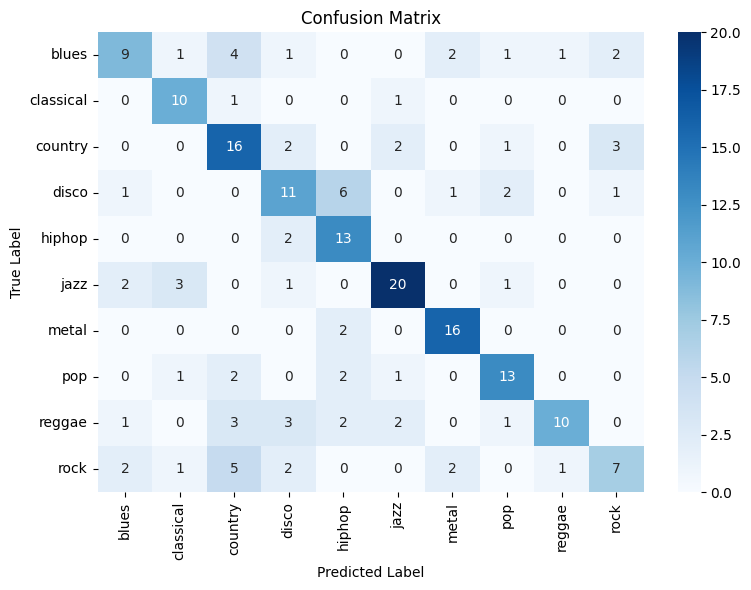

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Best accuracy achieved with CNN was 0.62. Attempt a different model

## CRNN
This model will better capture the temporal structure of the spectrogram.

In [ ]:
from tensorflow.keras import layers, models, regularizers, callbacks

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # After padding + pooling:
    # 128 → 64 → 32 (no shrinking from convs)
    # Final shape: (32, 32, 64)
    tf.keras.layers.Reshape((32, 2048)),  # 32x(32*64)

    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Fit model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 32, 2048)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │     1,114,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,135,306 (4.33 MB)

 Trainable params: 1,135,306 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1033 - loss: 2.4483 - val_accuracy: 0.0938 - val_loss: 2.3061
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 991ms/step - accuracy: 0.1301 - loss: 2.2728 - val_accuracy: 0.2000 - val_loss: 2.2213
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2328 - loss: 2.1342 - val_accuracy: 0.2125 - val_loss: 2.0391
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2737 - loss: 2.0203 - val_accuracy: 0.2937 - val_loss: 1.9294
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2902 - loss: 1.9188 - val_accuracy: 0.3250 - val_loss: 1.8721
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2849 - loss: 1.8947 - val_accuracy: 0.3375 - val_loss: 1.9020
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3188 - loss: 1.8485 - val_accuracy: 0.3187 - val_loss: 1.8242
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 983ms/step - accuracy: 0.3965 - loss: 1.7342 - val_accuracy: 0.3250 - val

In [1]:
# Model
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(5e-4)),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(5e-4)),
    layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.25),

    layers.Reshape((32, 2048)),
    # layers.Bidirectional(
    #     layers.LSTM(64, kernel_regularizer=regularizers.l2(5e-4))),
    layers.LSTM(64, return_sequences=False,
                kernel_regularizer=regularizers.l2(5e-4)),
    # layers.Dropout(0.5),

    layers.Dense(y.shape[1], activation='softmax',
                 kernel_regularizer=regularizers.l2(5e-4))
])

# Learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


NameError: name 'y' is not defined

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step


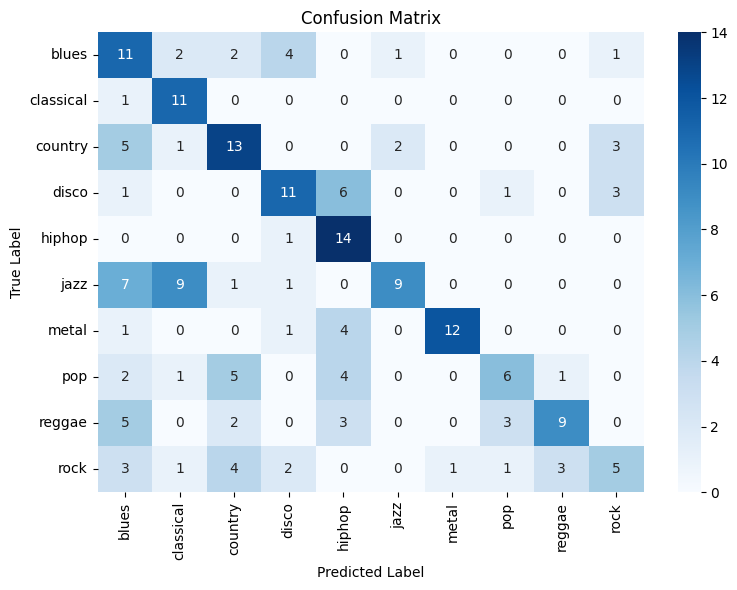

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
])

# Model
model = models.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomTranslation(0.1, 0.1),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(1e-4), input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.MaxPooling2D((2, 2)),

    layers.Reshape((32, 2048)),

    layers.LSTM(64, return_sequences=False,
                kernel_regularizer=regularizers.l2(1e-4)),

    layers.Dense(y.shape[1], activation='softmax',
                 kernel_regularizer=regularizers.l2(1e-4))
])

# Learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0998 - loss: 2.4179 - val_accuracy: 0.1250 - val_loss: 2.3537
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 995ms/step - accuracy: 0.1614 - loss: 2.3273 - val_accuracy: 0.1125 - val_loss: 2.2721
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1885 - loss: 2.2517 - val_accuracy: 0.1562 - val_loss: 2.1798
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2308 - loss: 2.1162 - val_accuracy: 0.2188 - val_loss: 2.1107
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 998ms/step - accuracy: 0.2091 - loss: 2.1158 - val_accuracy: 0.1688 - val_loss: 2.1101
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2488 - loss: 2.0887 - val_accuracy: 0.1750 - val_loss: 2.0977
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 980ms/step - accuracy: 0.2373 - loss: 2.0534 - val_accuracy: 0.1562 - val_loss: 2.1489
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2291 - loss: 2.0427 - val_accuracy: 0.2812 - 

In [ ]:
# Define the model for Bayesian search
def build_model(hp):
    model = models.Sequential()

    # Optional Data Augmentation
    if hp.Boolean("use_augmentation"):
        model.add(layers.RandomZoom(0.1))
        model.add(layers.RandomContrast(0.1))
        model.add(layers.RandomRotation(0.05))
        model.add(layers.RandomTranslation(0.1, 0.1))

    # Convolutional Layers
    model.add(layers.Conv2D(
        filters=hp.Choice('conv1_filters', [32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3])),
        input_shape=(128, 128, 3)
    ))
    if hp.Boolean("batch_norm"):
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Choice('conv2_filters', [64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
    ))
    if hp.Boolean("batch_norm"):
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # model.add(layers.Reshape((32, 2048)))
    model.add(layers.Reshape((
    model.output_shape[1],
    model.output_shape[2] * model.output_shape[3]
)))

    # LSTM or Bidirectional LSTM
    if hp.Boolean("use_bidirectional"):
        model.add(layers.Bidirectional(layers.LSTM(
            units=hp.Choice('lstm_units', [32, 64, 128]),
            kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
        )))
    else:
        model.add(layers.LSTM(
            units=hp.Choice('lstm_units', [32, 64, 128]),
            kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
        ))

    model.add(layers.Dense(
        y.shape[1],
        activation='softmax',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
    ))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Bayesian Optimization Tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='crnn_bayes_search',
    project_name='genre_bayes_opt',
    overwrite=True
)

# Run search (10–15 epochs per trial)
tuner.search(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate best model
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Best Validation Accuracy: {test_acc:.4f}")

# Summary of best hyperparameters
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for hp in best_hps.values:
    print(f"{hp}: {best_hps.get(hp)}")

Trial 5 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.5350000262260437
Total elapsed time: 00h 44m 41s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
True              |False             |use_augmentation
64                |32                |conv1_filters
0.001             |0.0005            |l2_reg
True              |False             |batch_norm
64                |128               |conv2_filters
False             |True              |use_bidirectional
128               |128               |lstm_units
0.0001            |0.0005            |learning_rate



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_b

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-15-43868aaefc28>", line 38, in build_model
    model.output_shape[1],
    ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 284, in output_shape
    raise AttributeError(
AttributeError: Sequential model 'sequential' has no defined output shape yet.


In [ ]:
# Define the model for Bayesian search
def build_model(hp):
    model = models.Sequential()

    # Data Augmentation
    if hp.Boolean("use_augmentation"):
        model.add(layers.RandomZoom(0.1))
        model.add(layers.RandomContrast(0.1))
        model.add(layers.RandomRotation(0.05))
        model.add(layers.RandomTranslation(0.1, 0.1))

    # Convolutional Layers
    model.add(layers.Conv2D(
        filters=hp.Choice('conv1_filters', [32, 64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3])),
        input_shape=(128, 128, 3)
    ))
    if hp.Boolean("batch_norm"):
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Choice('conv2_filters', [64, 128]),
        kernel_size=(3, 3),
        activation='relu',
        padding='same',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
    ))
    if hp.Boolean("batch_norm"):
        model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Reshape((32, -1)))

    # LSTM/Bidirectional
    if hp.Boolean("use_bidirectional"):
        model.add(layers.Bidirectional(layers.LSTM(
            units=hp.Choice('lstm_units', [32, 64, 128]),
            kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
        )))
    else:
        model.add(layers.LSTM(
            units=hp.Choice('lstm_units', [32, 64, 128]),
            kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
        ))

    model.add(layers.Dense(
        y.shape[1],
        activation='softmax',
        kernel_regularizer=regularizers.l2(hp.Choice('l2_reg', [1e-4, 5e-4, 1e-3]))
    ))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [1e-3, 5e-4, 1e-4])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Early stopping
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Bayesian Optimization
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1,
    directory='crnn_bayes_search',
    project_name='genre_bayes_opt',
    overwrite=True
)


tuner.search(
    X_train, y_train,
    epochs=15,
    validation_data=(X_test, y_test),
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Results
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Best Validation Accuracy: {test_acc:.4f}")

best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for hp in best_hps.values:
    print(f"{hp}: {best_hps.get(hp)}")


Trial 20 Complete [00h 20m 15s]
val_accuracy: 0.47999998927116394

Best val_accuracy So Far: 0.5049999952316284
Total elapsed time: 07h 06m 30s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.5153 - loss: 1.5072
Best Validation Accuracy: 0.5050
Best hyperparameters:
use_augmentation: False
conv1_filters: 32
l2_reg: 0.0001
batch_norm: False
conv2_filters: 128
use_bidirectional: False
lstm_units: 64
learning_rate: 0.001


In [ ]:
#                    False             |use_augmentation
# 64                |32                |conv1_filters
# 0.001             |0.0005            |l2_reg
# True              |False             |batch_norm
# 64                |128               |conv2_filters
# False             |True              |use_bidirectional
# 128               |128               |lstm_units
# 0.0001            |0.0005            |learning_rate
# Model
model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(5e-4), input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(5e-4)),
    layers.MaxPooling2D((2, 2)),

    layers.Reshape((32, -1)),
    layers.Bidirectional(
        layers.LSTM(128, kernel_regularizer=regularizers.l2(5e-4))),

    layers.Dense(y.shape[1], activation='softmax',
                 kernel_regularizer=regularizers.l2(5e-4))
])

# Learning rate decay
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=5e-4,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.0846 - loss: 3.2917 - val_accuracy: 0.1250 - val_loss: 2.9322
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1386 - loss: 2.8666 - val_accuracy: 0.1437 - val_loss: 2.6878
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2254 - loss: 2.5848 - val_accuracy: 0.1063 - val_loss: 2.5920
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2357 - loss: 2.3721 - val_accuracy: 0.2625 - val_loss: 2.3029
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2787 - loss: 2.1832 - val_accuracy: 0.3000 - val_loss: 2.1829
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3643 - loss: 2.0083 - val_accuracy: 0.3187 - val_loss: 1.9936
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3959 - loss: 1.9141 - val_accuracy: 0.2625 - val_loss: 2.1524
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3950 - loss: 1.9003 - val_accuracy: 0.3938 - val_loss: